In [1]:
import euclidemu2 as ee2py
import numpy as np
import matplotlib.pyplot as plt
import scipy, scipy.interpolate

In [2]:
# Parameter dictionary (accepts multiple formats)
cosmo_par={'As':2.1e-09,
           'ns':0.966,
           'Omb':0.04,
           'Omm':0.3,
           'H0':68,
           'mnu':0.05,
           'w':-1.0,
           'wa':0.0}

#Array with chosen redshifts (between 0 and 10)
redshifts=[0,2,4,6,8,10]

k, b = ee2py.get_boost(cosmo_par,redshifts)

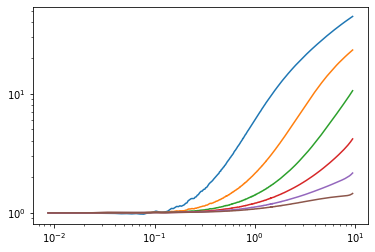

In [3]:
for i in range(len(redshifts)):
    plt.loglog(k,b[i])